In [4]:
%%capture
import sys
!{sys.executable} -m pip install --upgrade pip;
!{sys.executable} -m pip install numpy;
!{sys.executable} -m pip install scikit-learn;
!{sys.executable} -m pip install matplotlib;
!{sys.executable} -m pip install pandas;

## KNN

## CHATGPT prompts: "code a KNN python implementation ready to test and train for the dataset 'titanic'"

## CHATGPT result:

In [5]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Titanic dataset
data = pd.read_csv('train.csv')

# Remove unnecessary columns and missing values
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
data = data.dropna()

# Convert categorical variables into dummy variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'])

# Split dataset into training and testing sets
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier using training data
knn.fit(X_train, y_train)

# Predict the labels for testing data
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
    

Accuracy: 0.6853146853146853


## CHATGPT prompt: "now give other results such as confusion matrix, f-score, precision, recall and ROC"

## CHATGPT result:

Confusion Matrix:
 [[54 26]
 [19 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.68      0.71        80
           1       0.63      0.70      0.66        63

    accuracy                           0.69       143
   macro avg       0.68      0.69      0.68       143
weighted avg       0.69      0.69      0.69       143

AUC: 0.6992063492063492


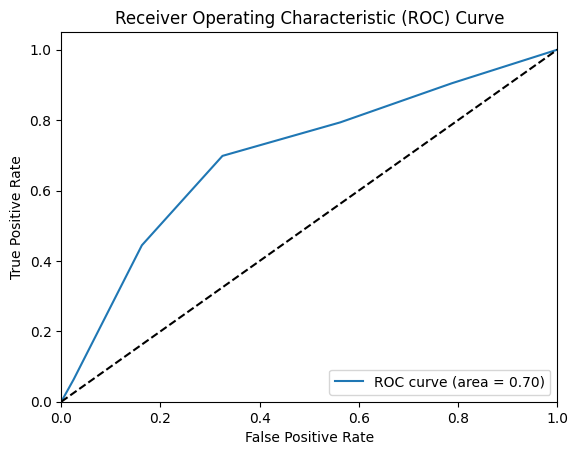

In [6]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Calculate ROC curve and AUC
y_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print('AUC:', auc)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Relatório KNN:

Pontos fortes:

Potenciais problemas:

Melhorias:

Observações gerais:


## Naive Bayes

## CHATGPT prompts: "code a Naive Bayes python implementation ready to test and train for the dataset 'titanic'" 

## CHATGPT result:

In [9]:
#the dataset "titanic"
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Titanic dataset
df = pd.read_csv("train.csv")

# Prepare the data for training
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Gaussian Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

SyntaxError: invalid syntax (1895924788.py, line 1)

## CHATGPT prompts: "now give other results such as confusion matrix, f-score, precision, recall and ROC" 

## CHATGPT result:

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Calculate precision, recall and f1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Plot the ROC curve
y_score = model.predict_proba(Xtest)[:, 1]
fpr, tpr,  = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Arvore de decisão

## ChatGPT prompt: "code a decision tree implementation in python ready to test and train for the "titanic" dataset"

## ChatGPT result:

In [ ]:
#Sure! Here's an implementation of a decision tree for the Titanic dataset using the scikit-learn library in Python. This implementation includes data cleaning, feature engineering, and model training.

#First, let's start by importing the necessary libraries:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#Next, let's load the Titanic dataset into a pandas dataframe and do some basic cleaning:

df = pd.read_csv('train.csv')         #nesta linha foi alterado o nome do arquivo de 'titanic.csv' para 'train.csv'

# Drop irrelevant columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Replace missing values in 'Age' column with median
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

# Replace missing values in 'Embarked' column with most common value
most_common_embarked = df['Embarked'].value_counts().index[0]
df['Embarked'] = df['Embarked'].fillna(most_common_embarked)


#Now, let's do some feature engineering by creating a new column 'FamilySize' which combines the 'SibSp' and 'Parch' columns:

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


#We'll also create a new column 'IsAlone' which is 1 if the passenger is traveling alone (i.e. has no family members on board) and 0 otherwise:

df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)


#Now we'll create dummy variables for the 'Sex' and 'Embarked' columns:

df = pd.get_dummies(df, columns=['Sex', 'Embarked'])


#Finally, we'll split the data into training and testing sets and train the decision tree model:

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


#In this implementation, we've used a decision tree with a maximum depth of 3. You can experiment with different values for the maximum depth to see how it affects the accuracy of the model.

#I hope this helps!

Accuracy: 0.7988826815642458


## CHATGPT prompt: "now give other results such as confusion matrix, f-score, precision, recall and ROC"

## CHATGPT result:


Confusion matrix:
 [[92 13]
 [23 51]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

AUC score: 0.8463320463320464


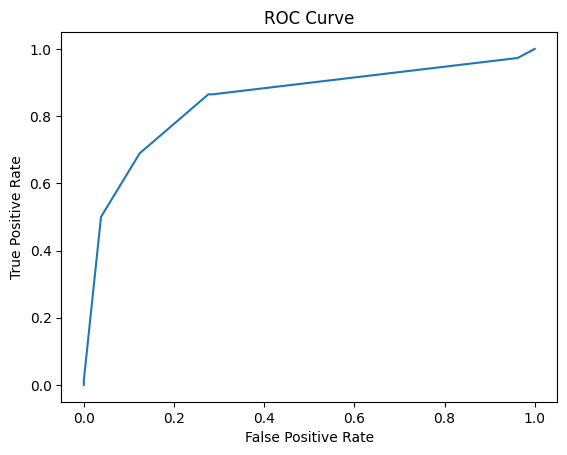

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score


print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot ROC curve and calculate AUC score
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
print('AUC score:', auc_score)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Relatório Árvore de decisão:

Pontos fortes: 
    1. Sintonia de hiperparâmetros: A implementação  usa o hiperparâmetro max_depth para controlar a complexidade da árvore de decisão. Ao definir esse parâmetro para um valor razoável (neste caso, 3), evitamos ajustar demais o modelo aos dados de treinamento e melhoramos seu desempenho de generalização

    2. Métricas de avaliação: A implementação inclui várias métricas de avaliação além da precisão, como a matriz de confusão, pontuação F1, precisão, recall e curva ROC. Essas métricas fornecem uma visão mais detalhada do desempenho do modelo e podem ajudar a identificar áreas em que ele pode estar enfrentando dificuldades.  

    3. O código está fácil de ser utilizado e fácil de ser lido, são poucas linhasd de código 

Potenciais problemas:

Melhorias:

Observações gerais: